In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

from clasificacion_humedales.utils.compare import amount_of_pixels_in_each_cluster
from clasificacion_humedales.utils.utils_maia import read_clustering, directories

In [4]:
PATH_IN, PATH_OUT = directories()

Tomamos un "píxel grande" de la imagen con resolución alta

In [5]:
image = read_clustering(PATH_IN + 'raster_UH_10x10.tif')
start, end = (4969, 1794)
submatrix = image[start:start+25,end:end+25]

Calculamos la proporción de cada clase

In [6]:
pixels_per_cluster = amount_of_pixels_in_each_cluster(submatrix)
total_amount_of_pixels = sum(list(pixels_per_cluster.values()))
for cluster in pixels_per_cluster.keys():
    pixels_per_cluster[cluster] = 100 * pixels_per_cluster[cluster] / total_amount_of_pixels

multiband = [pixels_per_cluster[0], 0, 0, pixels_per_cluster[3], pixels_per_cluster[4]]

Graficamos

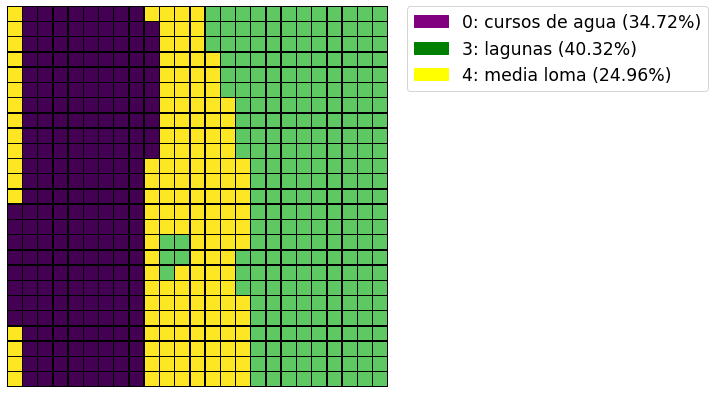

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
grid = plt.pcolormesh(submatrix, edgecolors='k', linewidths=0.5)
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')

purple = mpatches.Patch(color='purple', label = f'0: cursos de agua ({multiband[0]}%)')
green = mpatches.Patch(color='green', label = f'3: lagunas ({multiband[3]}%)')
yellow = mpatches.Patch(color='yellow', label = f'4: media loma ({multiband[4]}%)')
plt.legend(handles=[purple, green, yellow], fontsize='xx-large', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

grid.figure.savefig(PATH_OUT + 'grilla')